In [1]:
import sympy as sym
import numpy as np
import math
import scipy.linalg as la 
import matplotlib.pyplot as plt

In [2]:
from sympy.physics.quantum.dagger import Dagger

In [3]:
a3 = sym.Symbol('a3', real=True)
a4 = sym.Symbol('a4', real=True)
phi = sym.Symbol('phi', real=True)

In [4]:
def fisher_info(P):
    F = []
    for p in P:
        F.append((1/p)*(sym.diff(p, phi))**2)
    return F

In [5]:
C = ['gold', 'navy', 'magenta']
L = ['Detector 1', 'Detector 2', 'Coincidence Detection']
LW = [4,1.5,1]

def plot(P, title):
    fig, ax = plt.subplots(2, figsize=(9,7))
    
    ax[0].set(ylabel='Probability')
    for i in range(len(P)):
        ax[0].plot(np.linspace(0.1,2*np.pi,100), [sym.re(P[i].evalf(subs={phi:j})) for j in np.linspace(0.1,2*np.pi,100)], label=L[i], color=C[i], linewidth=LW[i])
    
    F =fisher_info(P)
    F_total = 0
    ax[1].set(xlabel='Phase (radians', ylabel='Fisher Information')
    for i in range(len(F)):
        F_total += F[i]
        ax[1].plot(np.linspace(0.1,2*np.pi,100), [sym.re(F[i].evalf(subs={phi:j})) for j in np.linspace(0.1,2*np.pi,100)], label=L[i], color=C[i], linewidth=LW[i])
    
    ax[1].plot(np.linspace(0.1,2*np.pi,100), [sym.re(F_total.evalf(subs={phi:j})) for j in np.linspace(0.1,2*np.pi,100)], label='Total', color='purple', linewidth=3)

    #ax[1].legend(bbox_to_anchor=(1.02,1), loc='upper left')
    plt.show()

In [6]:
e = sym.exp
U_mzi = sym.Matrix([[0.5*(1-e(1j*phi)), 0.5j*(1+e(1j*phi))], [0.5j*(1+e(1j*phi)), 0.5*(e(1j*phi)-1)]])

In [7]:
U_d = Dagger(U_mzi)
a1 = (U_d*sym.Matrix([a3,a4]))[0]
a2 = (U_d*sym.Matrix([a3,a4]))[1]

In [8]:
#case one
#psi_in = 1,0> = a1^dagger 0,0>
psi_out = Dagger(a1)

In [9]:
psi_out

a3*(-0.5*exp(1.0*I*phi) + 0.5) + 0.5*I*a4*(exp(1.0*I*phi) + 1)

In [10]:
prob10 = sym.Abs(-0.5*e(1j*phi) + 0.5)**2
prob01 = sym.Abs(0.5j*(e(1j*phi) + 1))**2

In [11]:
#case two
#psi_in = 1,1> = a1^dagger a2^dagger 0,0>
psi_out = (Dagger(a1))*(Dagger(a2))

In [12]:
psi_out

(a3*(-0.5*exp(1.0*I*phi) + 0.5) + 0.5*I*a4*(exp(1.0*I*phi) + 1))*(0.5*I*a3*(exp(1.0*I*phi) + 1) + a4*(0.5*exp(1.0*I*phi) - 0.5))

In [13]:
#a3^dagger a3^dagger 0,0> = 2,0>
prob20 = 0.5*sym.sin(phi)**2
#a4^dagger a4^dagger 0,0> = 0,2> 
prob02 = 0.5*sym.sin(phi)**2
#a3^dagger a4^dagger 0,0> = 1,1>
prob11 = sym.cos(phi)**2

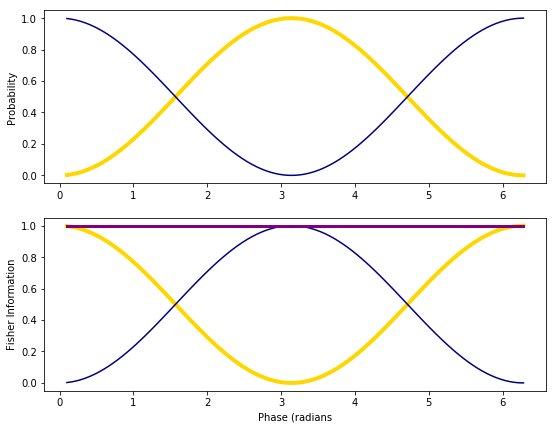

In [14]:
plot([prob10, prob01], 'One Photon')

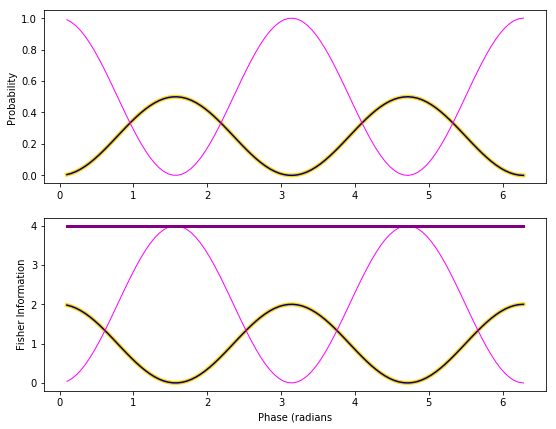

In [15]:
plot([prob20, prob02, prob11], 'Two Photons')

In [2]:
def sin(x):
    return np.sin(x)
def sin_2(x):
    return np.sin(2*x)

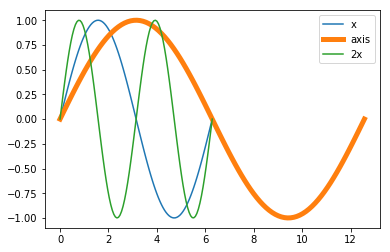

In [11]:
X = np.linspace(0,2*np.pi,100)
X2 = np.linspace(0,4*np.pi,100)

plt.plot(X, [sin(x) for x in X], label='x')
plt.plot(X2, [sin(x) for x in X], label='axis', linewidth=5)
plt.plot(X, [sin_2(x) for x in X], label='2x')
plt.legend()
plt.show()